In [0]:
import pandas as pd
import numpy as np

Mounting the Drive at My drive

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_dr = '/content/drive/My Drive/colab notebooks/Project - Sentiment_Analysis /labeledTrainData.tsv'
test_dr = '/content/drive/My Drive/colab notebooks/Project - Sentiment_Analysis /testData.tsv'

LOADING THE DATA

In [0]:
## LOADING THE DATA
train_data = pd.read_csv(train_dr, delimiter = '\t')
test_data = pd.read_csv(test_dr, delimiter = '\t')

In [5]:
train_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
test_data.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25000 non-null  object
 1   review  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


 Preview of the text

In [10]:
train_data["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [0]:
dataset = [train_data, test_data]
train_reviews = train_data.review
test_reviews = test_data.review
sentiments = train_data.sentiment

Analyzing the text data

In [0]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Function to plot frequency of words
def word_freq_plot(data, topk = 30): #Function to plot top most frequent words
    tokens = [doc.split() for doc in data] # Tokenized the data
    flattened = [word for sent in tokens for word in sent] #fatenned the tokenized data from list of lists to a list 
    freqs = FreqDist(flattened) 
    freqs.plot(topk, cumulative = False)
    return

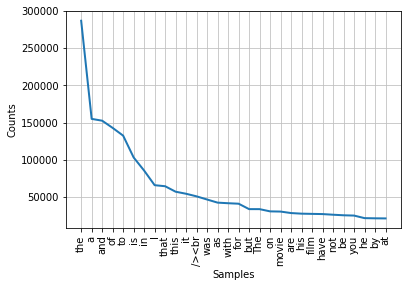

In [20]:
## Analyzing the word frequencies
word_freq_plot(train_reviews)

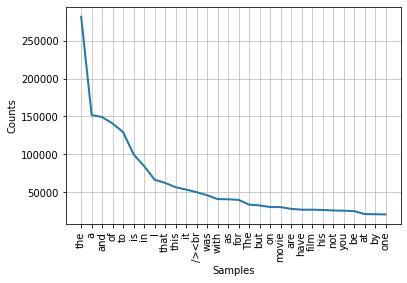

In [21]:
word_freq_plot(test_reviews)

Text Pre-processing

In [0]:
import re
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [0]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [11]:
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
## Stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [12]:

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
def preprocessed(text): # Function for text preprocessing
    text = text.lower() # to lowercase the text
    text = re.sub(r"\W"," ", text) # to remove all non-alphanumeric characters
    text = re.sub(r"\s+"," ", text) # to remove extra spaces
    text = re.sub(r"[ ]\w{1}\b"," ", text) # to remove words with single chsaracter
    text = re.sub(r"[^A-Za-z]+\b"," ", text) # to remove all the numbers
    text = " ".join([word for word in text.split() if not word in stop_words and word != 'br']) # to remove all the stopwords and word 'br'
    text = text.strip() # striping all the extra spaces at all start and end of the text
    text = " ".join([PorterStemmer().stem(word=word) for word in text.split()]) # stemming of texts
#text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [0]:

# Text Preprocessing
for data in dataset:
    data["review"] = data["review"].map(preprocessed)

Analyzing the text after preprocessing

In [16]:
for data in dataset:
    word_freq_plot(data["review"])

NameError: ignored

Splitting the data for cross validation

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_reviews, sentiments, test_size = 0.25, random_state = 0)

**FIRST APPROACH - BAG OF WORDS**


Applying TFIDF model 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(min_df = 0.01, max_df = 0.75, ngram_range = (1,2))

In [0]:
vector = model.fit(train_reviews)

In [0]:
#Total Features (Bag of words)
vocab1 = vector.get_feature_names()

In [35]:
len(vocab1)

1788

Transforming test and train data into Bag of words

In [0]:
X_train_vect1 = vector.transform(X_train)

In [0]:
X_test_vect1 = vector.transform(X_test)

In [38]:
X_train_vect1.shape

(18750, 1788)

Training the model

In [39]:
## Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier()
Y_value = RF.fit(X_train_vect1, Y_train).predict(X_test_vect1)
accuracy = accuracy_score(Y_test, Y_value, normalize = True)
accuracy

0.844

In [41]:
## Applying Liner SVM
from sklearn.svm import LinearSVC
lvsc = LinearSVC()
Y_value = lvsc.fit(X_train_vect1, Y_train).predict(X_test_vect1)
accuracy = accuracy_score(Y_test, Y_value, normalize = True)
accuracy

0.86432

In [43]:
## Applying Logistics Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
Y_value = lr.fit(X_train_vect1, Y_train).predict(X_test_vect1)
accuracy = accuracy_score(Y_test, Y_value, normalize = True)
accuracy

0.87568

In [0]:
## SO FAR LOGISTICS REGRESSION GIVING BEST RESULTS

Making Predictions

In [0]:
train_vector = vector.transform(train_reviews)
test_vector = vector.transform(test_reviews)

In [0]:
## Training for the complete dataset for LOGISTICS REGRESSIONS
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
Predictions = lr.fit(train_vector, sentiments).predict(test_vector)

In [0]:
Ids = test_data.id
Submission = pd.DataFrame({"id": Ids, "sentiment": Predictions})

In [48]:
Submission.head()

,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,0
4,12128_7,1


In [49]:
Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


**SECOND APPROACH - WORD2VEC EMBEDDING**

In [0]:
Submission.to_csv("Submission1.csv", index = False)

In [0]:

from gensim.models import Word2Vec
import gensim

In [0]:
tokenized_corpus = [sent.split() for sent in train_data.review]

Defining the word2vec model with DIM_SIZE = 60

In [0]:
DIM_SIZE = 60
model = Word2Vec(min_count = 10, size = DIM_SIZE, window = 3, iter=1,
                    workers=9)
model.build_vocab(tokenized_corpus)

In [55]:
model.train(tokenized_corpus, total_examples=model.corpus_count, epochs=2)

(5444879, 5964972)

In [0]:
## Function for converting word2vec vectors into Ssentence vectors by taking average
def word_to_sent_embedding (data, dim = 60):
    final_embedding = []
    for doc in data:
        sent_embedding = []
        for token in doc.split():
            if token not in model.wv.vocab:
                sent_embedding.append([0] * dim)
            else:
                sent_embedding.append(model[token])
        final_embedding.append(np.array(sent_embedding).mean(axis=0))
    return final_embedding

Converting the text data into word2vec vector then taking avg and converting further into sentence vectors

In [57]:
word_vectors = word_to_sent_embedding(train_data.review, dim = 60)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
sent_vector = np.asarray(word_vectors)

In [60]:
sent_vector.shape

(25000, 60)

Trainig and Evaluation of the model

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [62]:
RF = RandomForestClassifier()
scores = cross_val_score(RF, sent_vector, sentiments, cv=StratifiedKFold(n_splits=5, shuffle=True),
                                 verbose=1, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.79 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.9s finished


In [63]:
lvsc = LinearSVC()
scores = cross_val_score(lvsc, sent_vector, sentiments, cv=StratifiedKFold(n_splits=5, shuffle=True),
                                 verbose=1, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.81 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished


In [64]:
lr = LogisticRegression()
scores = cross_val_score(lr, sent_vector, sentiments, cv=StratifiedKFold(n_splits=5, shuffle=True),
                                 verbose=1, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.80 (+/- 0.00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [65]:

word_vectors = word_to_sent_embedding(train_data.review, dim = 60)
test_sent_vector = np.asarray(word_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Making Predictions

In [0]:
predictions_1 = lvsc.fit(sent_vector, sentiments).predict(test_sent_vector)

In [0]:
Ids = test_data.id
Submission = pd.DataFrame({"id": Ids, "sentiment": predictions_1})

In [68]:
Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [0]:
Submission.to_csv("Submission2.csv", index = False)

**APPROACH - 2A DOC2VEC**

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [71]:
# To apply doc2vec tagging of documument is required
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_corpus)]

[TaggedDocument(words=['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari', 'watch', 'wiz', 'watch', 'moonwalk', 'mayb', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'realli', 'cool', 'eighti', 'mayb', 'make', 'mind', 'whether', 'guilti', 'innoc', 'moonwalk', 'part', 'biographi', 'part', 'featur', 'film', 'rememb', 'go', 'see', 'cinema', 'origin', 'releas', 'subtl', 'messag', 'mj', 'feel', 'toward', 'press', 'also', 'obviou', 'messag', 'drug', 'bad', 'kay', 'visual', 'impress', 'cours', 'michael', 'jackson', 'unless', 'remot', 'like', 'mj', 'anyway', 'go', 'hate', 'find', 'bore', 'may', 'call', 'mj', 'egotist', 'consent', 'make', 'movi', 'mj', 'fan', 'would', 'say', 'made', 'fan', 'true', 'realli', 'nice', 'actual', 'featur', 'film', 'bit', 'final', 'start', 'minut', 'exclud', 'smooth', 'crimin', 'sequenc', 'joe', 'pesci', 'convinc', 'psychopath', 'power', 'drug', 'lord', 'want', 'mj', 'dead', 'bad', 'beyond', 'mj', 'overheard', 'plan', 'n

In [0]:
# Defining the Doc2Vec model Object for DIM_SIZE = 60
model = Doc2Vec(tagged_data, vector_size = DIM_SIZE, window=2, min_count=1, workers=4, epochs = 100)

In [73]:
# Preview of the Vector
model.infer_vector(["I", "dont", "like", "u"])

array([ 0.3493448 ,  0.36076495, -0.10125713,  0.46365285, -0.38948902,
        0.6499239 , -0.9119557 ,  0.11388295,  0.4653028 , -0.53572804,
       -0.05913225,  0.43654585, -0.5515135 ,  0.20586175, -0.00302443,
        0.6279772 , -0.32015353,  0.43799594,  0.02118275, -1.2137485 ,
       -0.6147293 , -0.83128834,  0.87686384, -0.15731855, -0.73422545,
       -0.3484379 ,  0.47726724, -0.8226586 , -0.30018985, -0.37516755,
       -0.09729093,  0.34126264,  0.02563147,  0.56143147, -0.6376202 ,
        0.18188441, -0.25293213, -0.481766  , -0.14137647,  0.858242  ,
        0.17985055,  0.03918842,  0.2756271 ,  0.7926732 ,  1.1749176 ,
       -0.02519091,  0.30495375,  0.27557442,  0.33534873,  0.76411676,
        0.30661735, -0.61193275,  0.01010175, -0.28593758, -0.5029322 ,
       -0.46386808, -0.02603647, -0.93002284,  0.79538256,  0.40304673],
      dtype=float32)

In [0]:

test_tokenize  =[doc.split() for doc in test_data.review]

In [0]:
# Function to store all doc vectors in a list 
def doc_to_vector(data):
    vectors = []
    for doc in data:
        tokens = doc.split()
        vectors.append(model.infer_vector(tokens))
    return vectors

In [0]:
# Calling the function for train and test data
train_vector = doc_to_vector(train_data.review) # train doc vextors
test_vector = doc_to_vector(test_data.review) # test doc vectors

In [0]:
# Converting vector list into arrays
train_vector = np.asarray(train_vector)
test_vector = np.asarray(test_vector)

In [78]:
train_vector.shape

(25000, 60)

Training the Vectors

In [79]:
lvsc = LinearSVC()
scores = cross_val_score(lvsc, train_vector, sentiments, cv=StratifiedKFold(n_splits=5, shuffle=True),
                                 verbose=1, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.86 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished


In [80]:

lr = LogisticRegression()
scores = cross_val_score(lr, train_vector, sentiments, cv=StratifiedKFold(n_splits=5, shuffle=True),
                                 verbose=1, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.86 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Making Predictions

In [81]:
predictions_1 = lvsc.fit(train_vector, sentiments).predict(test_vector)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
Ids = test_data.id
Submission = pd.DataFrame({"id": Ids, "sentiment": predictions_1})

In [83]:
Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [0]:
Submission.to_csv("Submission3.csv", index = False)

**Approach 3- RNN - LSTM Network **

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data.review, sentiments, test_size = 0.25, random_state = 0)

In [0]:
tokens = [word for text in train_data.review for word in text.split()]

In [17]:
len(set(tokens))

50430

Converting text into integer sequences

In [18]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.review)

vocab_size = len(tokenizer.word_index) + 1

In [20]:
vocab_size

50351

In [0]:
encoded_docs = tokenizer.texts_to_sequences(train_data.review)

In [22]:
print(train_data.review[1], "\n", encoded_docs[1])

classic war world timothi hine entertain film obvious goe great effort length faith recreat well classic book mr hine succe watch film appreci fact standard predict hollywood fare come everi year spielberg version tom cruis slightest resembl book obvious everyon look differ thing movi envis amateur critic look critic everyth other rate movi import base like entertain peopl never agre critic enjoy effort mr hine put faith well classic novel found entertain made easi overlook critic perceiv shortcom 
 [236, 196, 90, 3143, 5695, 160, 2, 462, 191, 25, 520, 1368, 1016, 2955, 16, 236, 152, 320, 5695, 2472, 11, 2, 649, 98, 682, 488, 276, 1887, 44, 91, 43, 2611, 194, 697, 2733, 3079, 1289, 152, 462, 223, 18, 147, 34, 1, 7277, 1812, 499, 18, 499, 204, 343, 207, 1, 483, 336, 4, 160, 22, 50, 704, 499, 76, 520, 320, 5695, 138, 1016, 16, 236, 473, 181, 160, 33, 684, 1900, 499, 4030, 4242]


In [23]:
max_length = max([len(text.split()) for text in train_data.review])
print(max_length)

1407


Padding the sequence for equal dimension of document sequences

In [0]:
from keras.preprocessing.sequence import pad_sequences

# pad documents to a max length
padded_docs = pad_sequences(encoded_docs, maxlen=100, padding='post')

In [0]:
max_features = 30000

Defining LSTM Network

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Flatten
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=100)) # sequences to Embedding Layer
model.add(LSTM(32, dropout=0.2)) # LSTM layer
#model.add(Flatten())
#model.add(Dense(16, activation='tanh')) 
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          5035100   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 5,052,157
Trainable params: 5,052,157
Non-trainable params: 0
_________________________________________________________________


Training and Evaluation of the model

In [39]:
print('Train...')
history =model.fit(padded_docs, sentiments, epochs=10, verbose=1, validation_split=0.3, batch_size = 64, workers=30)

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.5089 - accuracy: 0.7293 - val_loss: 0.3477 - val_accuracy: 0.8573
Epoch 2/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.2458 - accuracy: 0.9089 - val_loss: 0.3480 - val_accuracy: 0.8676
Epoch 3/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.1399 - accuracy: 0.9543 - val_loss: 0.4082 - val_accuracy: 0.8625
Epoch 4/10
17500/17500 [==============================] - 47s 3ms/step - loss: 0.0878 - accuracy: 0.9750 - val_loss: 0.4590 - val_accuracy: 0.8571
Epoch 5/10
17500/17500 [==============================] - 47s 3ms/step - loss: 0.0710 - accuracy: 0.9806 - val_loss: 0.5956 - val_accuracy: 0.8495
Epoch 6/10
17500/17500 [==============================] - 47s 3ms/step - loss: 0.0484 - accuracy: 0.9878 - val_loss: 0.6550 - val_accuracy: 0.8471
Epoch 7/10
17500/17500 [==============================] - 47s 3ms/ste

Analyzing the model by plotting loss and accuracy vs Epochs

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


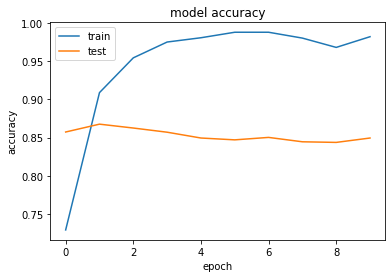

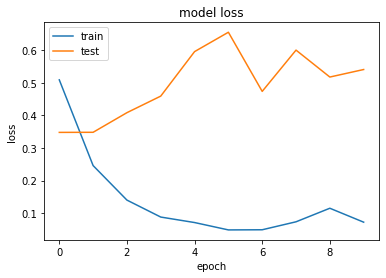

In [40]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()